In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [2]:
dataset = pd.read_csv("E:\datafiles\diabetes.csv")
print(len(dataset))
print(dataset.head())

768
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [3]:
#Values of columns like 'Glucose','BloodPressure' cannot be accepted as Zeros because it will effect the outcome
#We can replace such values with the mean of the respective column.

#Replace Zeroes

zero_not_accepted = ['Glucose','BloodPressure','SkinThickness','BMI','Insulin']

for column in zero_not_accepted:
    dataset[column] = dataset[column].replace(0,np.NaN)
    mean = int(dataset[column].mean(skipna=True))
    dataset[column] = dataset[column].replace(np.NaN,mean)

In [4]:
print(dataset['Glucose'])

0      148.0
1       85.0
2      183.0
3       89.0
4      137.0
       ...  
763    101.0
764    122.0
765    121.0
766    126.0
767     93.0
Name: Glucose, Length: 768, dtype: float64


In [5]:
#Before proceeding further,lets split the dataset into train and test:

#split dataset
#our X dataset is :,0:8 i.e, (0,1,2,3,4,5,6,7) 
#our y dataset is :,8 hence 9th column is Outcome

X = dataset.iloc[:,0:8]
y = dataset.iloc[:,8]
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,test_size=0.2)

In [6]:
#Any algorithm that computes distance or assumes normality scale your features.

#Feature Scaling:

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [7]:
len(y)

768

In [8]:
import math
math.sqrt(len(y_train))

24.779023386727733

In [9]:
import math
math.sqrt(len(y_test))

12.409673645990857

In [10]:
#Here N_neighbors is 'K',p is the power parameter to define the metric used,which is 'Euclidean' in our case
#Then define the model using KNeighborsClassifier and fit the train data in the model.

#Define the model:init K-NN

classifier = KNeighborsClassifier(n_neighbors=11,p=2,metric='euclidean')

In [11]:
#fit model

classifier.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

In [12]:
#Predict the test set results

y_pred = classifier.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [13]:
#It's important to evaluate the model,let's use confusion matrix to do that

#Evaluate model

cm = confusion_matrix(y_test,y_pred)
print(cm)

[[94 13]
 [15 32]]


Text(33.0, 0.5, 'truth')

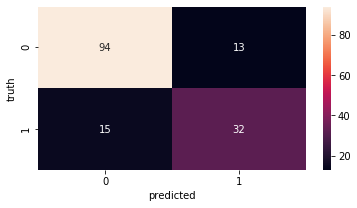

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(6,3))
sn.heatmap(cm,annot=True)
plt.xlabel('predicted')
plt.ylabel('truth')

In [15]:
print(f1_score(y_test,y_pred))

0.6956521739130436


In [16]:
print(accuracy_score(y_test,y_pred))

0.8181818181818182


In [17]:
#predicting (y_pred) the individual values by using our classifier.predict

y_pred = classifier.predict([[6,148,72,35,0,33.6,0.627,50]])
y_pred

array([1], dtype=int64)

In [18]:
y_pred = classifier.predict([[1,85,66,29,0,26.6,0.351,31]])
y_pred

array([1], dtype=int64)

In [19]:
y_pred = classifier.predict([[1,89,66,23,94,28.1,0.167,21]])
y_pred

array([1], dtype=int64)